#HW2 
jb4600, Jan Batzner
10/18/2021

#Part 1: 
##Regression on California Test Scores
First, I prepare my workspace.



In [20]:
import pandas as pd
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

In [21]:
# change the working directory
import os 
print(os.getcwd())
os.chdir("C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\04_2022Spring_CU\\GR5069_AppliedDS\\03_TakeHomeExercise\\gr5069-homework-2-janbatzner")
print("New cwd = " + os.getcwd())

C:\Users\hs324\OneDrive\Desktop\Class_Files\04_2022Spring_CU\GR5069_AppliedDS\03_TakeHomeExercise\gr5069-homework-2-janbatzner
New cwd = C:\Users\hs324\OneDrive\Desktop\Class_Files\04_2022Spring_CU\GR5069_AppliedDS\03_TakeHomeExercise\gr5069-homework-2-janbatzner


In [22]:
# use the relative path
os.getcwd()
df1=pd.read_csv(".\\data\\Caschool.csv")

In [23]:
# Load relevant Packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt 
%matplotlib inline 

###1.1 
Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

**target feature: test score (testscr)**

Text(0, 0.5, 'Count')

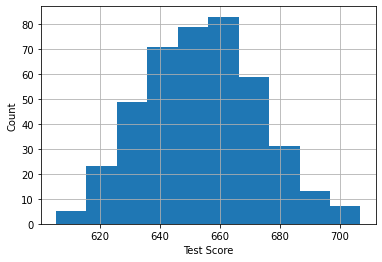

In [84]:
from matplotlib import pyplot as plt 
df1['testscr'].hist()
plt.xlabel('Test Score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

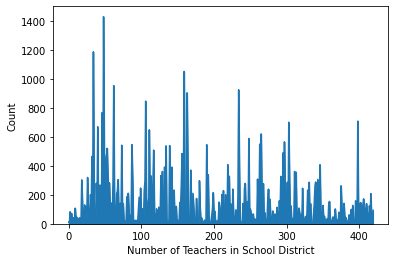

In [85]:
df1['teachers'].plot.area()
plt.xlabel('Number of Teachers in School District')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

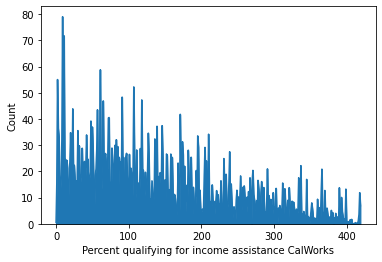

In [86]:
df1['calwpct'].plot.area()
plt.xlabel('Percent qualifying for income assistance CalWorks')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

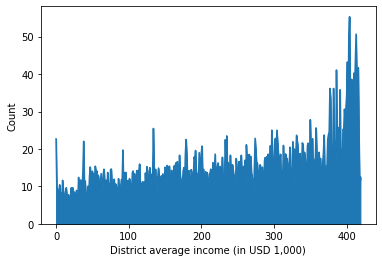

In [87]:
df1['avginc'].plot.area()
plt.xlabel('District average income (in USD 1,000)')
plt.ylabel('Count')

###1.2
Visualize the dependency of the target on each feature from 1.1.


**Results:** The graphs down below show, a negative relationship between the number of Calworks recipients and testscores, as well as a positive relationship of average income and testscores. From our graph we can not interpret a relationship between number of teachers and testscores.

Text(0, 0.5, 'Number of Teachers in School District')

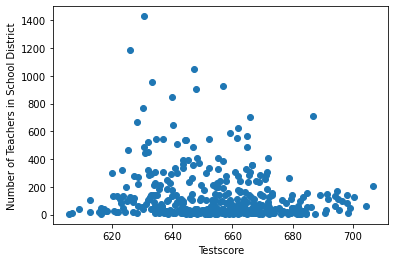

In [88]:
# Teachers in School District
plt.scatter(df1['testscr'], df1['teachers'])
plt.xlabel("Testscore")
plt.ylabel("Number of Teachers in School District")

Text(0, 0.5, 'Percent qualifying for income assistance CalWorks')

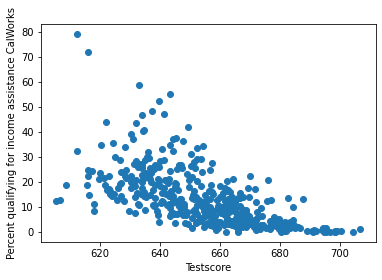

In [89]:
# Calworks Income Assistance
plt.scatter(df1['testscr'], df1['calwpct'])
plt.xlabel("Testscore")
plt.ylabel("Percent qualifying for income assistance CalWorks")

Text(0, 0.5, 'Average income')

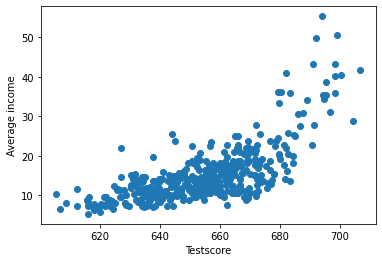

In [90]:
# Average Income
plt.scatter(df1['testscr'], df1['avginc'])
plt.xlabel("Testscore")
plt.ylabel("Average income")

###1.3
Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [113]:
df1 = df1.iloc[:, 1:] 
df1 = df1.drop(['readscr', 'mathscr', 'distcod', 'county', 'district', 'grspan'], axis=1)

In [114]:
y = df1['testscr'] 
X = df1.loc[:, df1.columns != "testscr"]

In [115]:
# Create train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [116]:
# Models with default parameters
# The scaling of predictors will be only performed after
knn =  KNeighborsRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.32371148919992, tolerance: 10.135477633342422
  positive)


In [117]:
# Training Set Scores of KNN, LR, Ridge, and Lasso
train_sc = [(knn.score(X_train, y_train)), 
            (lr.score(X_train, y_train)), 
            (ridge.score(X_train, y_train)), 
            (lasso.score(X_train, y_train))]
print(train_sc)

[0.30264152542727396, 0.805466898083568, 0.8054613325106025, 0.8046406682719547]


In [118]:
# Test Set Scores of KNN, LR, Ridge, and Lasso
test_sc = [(knn.score(X_test, y_test)), 
           (lr.score(X_test, y_test)), 
           (ridge.score(X_test, y_test)), 
           (lasso.score(X_test, y_test))]
print(test_sc)

[0.08485554970397358, 0.8070239455626853, 0.8074600282558798, 0.8069004552587604]


In [119]:
# Mean Cross Validation Scores of KNN, LR, Ridge, and Lasso
mCV_sc = [(np.mean(cross_val_score(knn, X_train, y_train, scoring="r2"))), 
          (np.mean(cross_val_score(lr, X_train, y_train, scoring="r2"))), 
          (np.mean(cross_val_score(ridge, X_train, y_train, scoring="r2"))), 
          (np.mean(cross_val_score(lasso, X_train, y_train, scoring="r2")))]
print(mCV_sc)

[-0.05399014482377125, 0.7807020742805933, 0.7826902950593004, 0.78678598396409]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.776310905559512, tolerance: 7.975809273265566
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1451.5511712081152, tolerance: 7.8882868917286695
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2799.6911917573225, tolerance: 8.25802898609718
  positive)


**Results**:
OLS regression, ridge and lasso regression have good values. Their cross-validation scores are highly similar.

Looking at the mean cross-validation scores, the KNN regression model has a very low R-squared and performs poorly.

**Step 2:** scaled X data

In [120]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [121]:
# Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [122]:
knn2 =  KNeighborsRegressor().fit(X_train_scaled, y_train)
lr2 = LinearRegression().fit(X_train_scaled, y_train)
ridge2 = Ridge().fit(X_train_scaled, y_train)
lasso2 = Lasso().fit(X_train_scaled, y_train)

In [123]:
train2_sc = [(knn2.score(X_train_scaled, y_train)), 
                    (lr2.score(X_train_scaled, y_train)), 
                    (ridge2.score(X_train_scaled, y_train)), 
                    (lasso2.score(X_train_scaled, y_train))]
print(train2_sc)

[0.8093746497315928, 0.8054668980835678, 0.8054474937982297, 0.7967326633807648]


In [124]:
test2_sc = [(knn2.score(X_test_scaled, y_test)), 
            (lr2.score(X_test_scaled, y_test)), 
            (ridge2.score(X_test_scaled, y_test)), 
            (lasso2.score(X_test_scaled, y_test))]
print(test2_sc)

[0.7689310586146227, 0.8070239455626844, 0.8069708569856141, 0.7860587618553802]


In [125]:
mCV2_sc = [(np.mean(cross_val_score(knn2, X_train_scaled, y_train, scoring="r2"))), 
           (np.mean(cross_val_score(lr2, X_train_scaled, y_train, scoring="r2"))), 
           (np.mean(cross_val_score(ridge2, X_train_scaled, y_train, scoring="r2"))), 
           (np.mean(cross_val_score(lasso2, X_train_scaled, y_train, scoring="r2")))]
print(mCV2_sc)

[0.7111400899098531, 0.7807020742805932, 0.7834509841384872, 0.784397424132983]


**Results:** The mean cross validation scores are good overall models. Scaling suggests the models above would work well to new data.

###1.4
Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

There is no parameter to tune for OLS regression. What will be tuned is the n_neighbors parameter for KNN regression, and the alpha parameters for Lasso and Ridge.  

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold()

gridsearchCV to KNN: 



In [128]:
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(knn2, param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.728
best parameters: {'n_neighbors': 13}
test-set score: 0.760


gridsearchCV to Ridge: 

In [129]:
param_grid_ridge = {'alpha': np.arange(0.01, 10, 0.01)} 
grid_ridge = GridSearchCV(ridge2, param_grid=param_grid_ridge, cv=10)
grid_ridge.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_ridge.best_score_))
print("best parameters: {}".format(grid_ridge.best_params_))
print("test-set score: {:.3f}".format(grid_ridge.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.784
best parameters: {'alpha': 9.99}
test-set score: 0.804


gridsearchCV to Lasso:



In [130]:
param_grid_lasso = {'alpha': np.arange(0.01,10, 0.01)}
grid_lasso = GridSearchCV(lasso2, param_grid=param_grid_lasso, cv=10)
grid_lasso.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_lasso.best_score_))
print("best parameters: {}".format(grid_lasso.best_params_))
print("test-set score: {:.3f}".format(grid_lasso.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.785
best parameters: {'alpha': 0.22}
test-set score: 0.803


###1.5
Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

The two best models are the ones with the best cross validation scores. In our case, its Ridge and Lasso regression (with scaled predictors, optimized with GridSearchCV).
Comparing the coefficients, both agree that mealpct, avginc and elpct are the most relevant features. 

In [131]:
print("lasso1.coef_: {}".format(lasso2.coef_)) 
print("ridge1.coef_: {}".format(ridge2.coef_)) 
X.columns

lasso1.coef_: [ -0.          -0.          -0.         -10.63996226  -0.
   0.           0.45852359  -0.22704534   3.32363204  -2.55679942]
ridge1.coef_: [ 0.07269491 -0.92810378 -1.24237127 -9.65603891  0.94468825 -0.08099605
  1.15706149 -0.63971526  3.7388452  -3.52255519]


Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')

###1.6
Discuss which final model you would choose to predict new data.

When I decide for a model, I go for the highest cross validation score to make my model applicable to new data. Concluding my analysis above, I would choose the Lasso regression (scaled predictors, alpha-parameter optimized with gridSearchCV) in that specific case.

# Part 2: Classification on red and white wine characteristics


In [132]:
dfred = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
dfred['winetype']='1'

In [133]:
dfwhite = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
dfwhite['winetype']='0'

In [135]:
winesredwhi = [dfred, dfwhite]
wine = pd.concat(winesredwhi)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
#red = pd.read_csv('/content/winequality-red.csv', sep=';')
#white = pd.read_csv('/content/winequality-white.csv', sep=';')

#red['winetype'] = 1
#white['winetype'] = 0

#wine = red.append(white,ignore_index=True)

#

In [136]:
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype']

###2.1 
Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature. 

([<matplotlib.axis.XTick at 0x7f811769efd0>,
 [Text(0, 0, 'white'), Text(0, 0, 'red')])

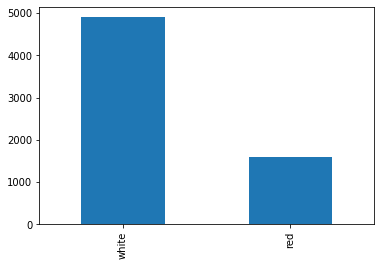

In [137]:
wine['winetype'].value_counts().plot.bar()
bars = ('white', 'red')
plt.xticks(x_pos, bars)

My expectation, what is related to the winetype:
Free sulfur dioxide level, pH value and the residual sugar.

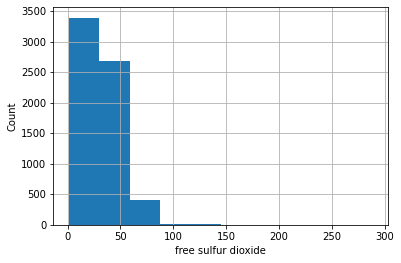

In [141]:
# No bivariate visualization between red and white wine,
# as asked for univariate distribution of wine
wine['free sulfur dioxide'].hist()
plt.xlabel('free sulfur dioxide')
plt.ylabel('Count')
plt.show()

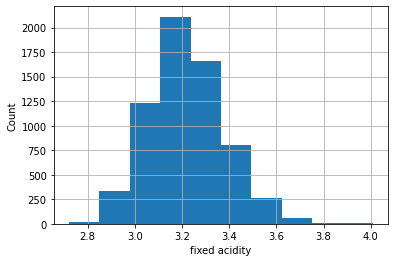

In [142]:
wine['pH'].hist()
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.show()

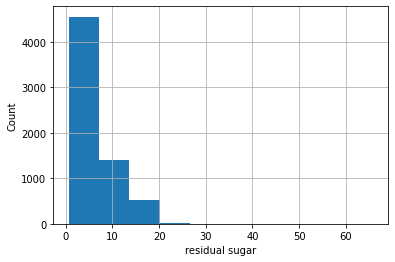

In [143]:
wine['residual sugar'].hist()
plt.xlabel('residual sugar')
plt.ylabel('Count')
plt.show()

###2.2
Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [146]:
# Compare Mean Cross Validation Scores (unscaled data)
logreg = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
penlogreg = LogisticRegression(penalty='l2', max_iter=10000).fit(X_train, y_train)
knn =  KNeighborsClassifier().fit(X_train, y_train)
meanCV_scores = [(np.mean(cross_val_score(logreg, X_train, y_train))), (np.mean(cross_val_score(penlogreg, X_train, y_train))), (np.mean(cross_val_score(knn, X_train, y_train)))]
print(meanCV_scores)

[0.9915851103037963, 0.9858377296898858, 0.9427346917285316]


All three models have good, similar mean cross-validation scores though their predictors are not even scaled yet. 

**Step 2:** scaled X-data

In [1]:
# Scaling Predictors
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

logreg1 = LogisticRegression(penalty='none', max_iter=10000).fit(X_train_scaled, y_train)
penlogreg1 = LogisticRegression(penalty='l2', max_iter=10000).fit(X_train_scaled, y_train)
knn1 =  KNeighborsClassifier().fit(X_train_scaled, y_train)

meanCV1_scores = [(np.mean(cross_val_score(logreg1, X_train_scaled, y_train))), (np.mean(cross_val_score(penlogreg1, X_train_scaled, y_train))), (np.mean(cross_val_score(knn1, X_train_scaled, y_train)))]
print(meanCV1_scores)

NameError: name 'StandardScaler' is not defined

With scaling the predictors, the mean cross-validation scores is even higher. Especially for the KNN classifier that is the case. The models perform very well.

###2.3
Tune the parameters where possible using GridSearchCV. Do the results improve?

1) Penalized logistic regression: we can tune the C-parameter. 

---


2) KNN classifier: we can tune the n_neighbors parameter. 

1) Penalized logistic regression:

In [ ]:
#Penalized logistic regression
param_grid_penlogreg1 = {'C': np.arange(0.01,1, 0.01)} #I defined a relatively narrow range of C-values here, as small ones seem to work best. 
grid_penlogreg1 = GridSearchCV(penlogreg1, param_grid=param_grid_penlogreg1, cv=skfold)
grid_penlogreg1.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_penlogreg1.best_score_))
print("best parameters: {}".format(grid_penlogreg1.best_params_))
print("test-set score: {:.3f}".format(grid_penlogreg1.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 0.81}
test-set score: 0.990


2) KNN classifier:

In [ ]:
# KNN classifier
param_grid_knn1 = {'n_neighbors': np.arange(1,15,2)}
grid_knn1 = GridSearchCV(knn1, param_grid=param_grid_knn1, cv=skfold)
grid_knn1.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn1.best_score_))
print("best parameters: {}".format(grid_knn1.best_params_))
print("test-set score: {:.3f}".format(grid_knn1.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
test-set score: 0.991


###2.4
Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(shuffle=True, random_state=42)

In [ ]:
grid_penlogreg2 = GridSearchCV(penlogreg1, param_grid=param_grid_penlogreg1, cv=kfold)
grid_penlogreg2.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_penlogreg2.best_score_))
print("best parameters: {}".format(grid_penlogreg2.best_params_))
print("test-set score: {:.3f}".format(grid_penlogreg2.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.993
best parameters: {'C': 0.54}
test-set score: 0.990


In [ ]:
grid_knn2 = GridSearchCV(knn1, param_grid=param_grid_knn1, cv=kfold)
grid_knn2.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn2.best_score_))
print("best parameters: {}".format(grid_knn2.best_params_))
print("test-set score: {:.3f}".format(grid_knn2.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.989


Both the C-parameter for penalized logistic regression, and the neighbors paramter for KNN classification change when changing the CV-method from stratified K-fold to K-fold with shuffling. 

**Part 2:** Change the random seed for shuffling

In [ ]:
kfold1 = KFold(shuffle=True, random_state=13)

In [ ]:
grid_penlogreg3 = GridSearchCV(LogisticRegression(max_iter=10000, penalty='l2'), param_grid=param_grid_penlogreg1, cv=kfold1)
grid_penlogreg3.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_penlogreg3.best_score_))
print("best parameters: {}".format(grid_penlogreg3.best_params_))
print("test-set score: {:.3f}".format(grid_penlogreg3.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.993
best parameters: {'C': 0.8}
test-set score: 0.990


In [ ]:
grid_knn3 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn1, cv=kfold1)
grid_knn3.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn3.best_score_))
print("best parameters: {}".format(grid_knn3.best_params_))
print("test-set score: {:.3f}".format(grid_knn3.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
test-set score: 0.991


The optimal C-parameter for penalized logistic regression, and the optimal n_neighbors parameter for KNN classification according to GridSearchCV change again - after resetting the random state for shuffling for the KFold cross-validation. 

**GridSearchCV:** change random state for train_test_split

In [ ]:
Xrs_train, Xrs_test, yrs_train, yrs_test = train_test_split(X, y, random_state=13) 
scaler = preprocessing.StandardScaler()
scaler.fit(Xrs_train)
Xrs_train_scaled =scaler.transform(Xrs_train)
Xrs_test_scaled =scaler.transform(Xrs_test)

In [ ]:
grid_penlogreg4 = GridSearchCV(LogisticRegression(max_iter=10000, penalty='l2'), param_grid=param_grid_penlogreg1, cv=skfold)
grid_penlogreg4.fit(Xrs_train_scaled, yrs_train)
print("best mean cross-validation score: {:.3f}".format(grid_penlogreg4.best_score_))
print("best parameters: {}".format(grid_penlogreg4.best_params_))
print("test-set score: {:.3f}".format(grid_penlogreg4.score(Xrs_test_scaled, yrs_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 0.85}
test-set score: 0.996


In [ ]:
grid_knn4 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn1, cv=skfold)
grid_knn4.fit(Xrs_train_scaled, yrs_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn4.best_score_))
print("best parameters: {}".format(grid_knn4.best_params_))
print("test-set score: {:.3f}".format(grid_knn4.score(Xrs_test_scaled, yrs_test)))

best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 1}
test-set score: 0.994


Changing the random seed for the train_test_split slightly changed the optimal C-parameter. The optimal n_neighbors parameter as selected using GridSearchCV are not changed. 

###2.5
Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [ ]:
print("logreg1 .coef_: {}".format(logreg1 .coef_))
print("penlogreg1 .coef_: {}".format(penlogreg1 .coef_))
X.columns

logreg1 .coef_: [[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
penlogreg1 .coef_: [[ 0.66799484  1.53089613 -0.28169198 -3.32824062  0.85778235  0.89842203
  -2.85276141  3.04102359  0.41924655  0.73896561  0.85589094  0.26665706]]


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
print("best mean cross-validation score: {:.6f}".format(grid_logreg1.best_score_))
print("best mean cross-validation score: {:.6f}".format(grid_penlogreg1.best_score_)) 

best mean cross-validation score: 0.994253
best mean cross-validation score: 0.993637


Looking at the above values, the coefficients for unpenalized and penalized regression differ for some predictors. That is because the penalized regression decreased some coefficients. The coefficients with larger values (unpenalized regression), likely also have larger values in penalized regressions.


Looking at the mean cross validation scores of the model: both are high, and very similar. What tells us, they likely predict new data well. Anyway, there is a risk of overfitting, so the penalized logistic regression might be the best choice.  